# Análisis Exploratorio de Datos de Estudiantes
 Este notebook realiza un análisis exploratorio de un conjunto de datos de estudiantes, 
 explorando su rendimiento académico y características demográficas.

In [1]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Actividad 1:**
Realizar la carga de los datos en DataFrame diferentes. Mostrar la información de cada DataFrame y los primeros 5 datos.
DataFrame y los primeros 5 datos.

In [2]:
# Ruta base a los datos
path = "../data/raw/"

# Cargar los datos
assessments_df = pd.read_csv(f'{path}assessments.csv')
courses_df = pd.read_csv(f'{path}courses.csv')
student_assessment_df = pd.read_csv(f'{path}studentAssessment.csv')
student_info_df = pd.read_csv(f'{path}studentInfo.csv')
student_registration_df = pd.read_csv(f'{path}studentRegistration.csv')
student_vle_df = pd.read_csv(f'{path}studentVle.csv')
vle_df = pd.read_csv(f'{path}vle.csv')

In [3]:
def mostrar_info_df(df, nombre):
    print(f"\n--- Información de {nombre} ---")
    print(f"Forma: {df.shape}")
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nPrimeros 5 registros:")
    print(df.head())
    print("-" * 50)

In [4]:
# Mostrar informacion y las primeras filas de cada DataFrame
mostrar_info_df(assessments_df, "assessments_df")
mostrar_info_df(courses_df, "courses_df")
mostrar_info_df(student_assessment_df, "student_assessment_df")
mostrar_info_df(student_info_df, "student_info_df")
mostrar_info_df(student_registration_df, "student_registration_df")
mostrar_info_df(student_vle_df, "student_vle_df")
mostrar_info_df(vle_df, "vle_df")


--- Información de assessments_df ---
Forma: (206, 6)

Tipos de datos:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                  object
weight               float64
dtype: object

Primeros 5 registros:
  code_module code_presentation  id_assessment assessment_type date  weight
0         AAA             2013J           1752             TMA   19    10.0
1         AAA             2013J           1753             TMA   54    20.0
2         AAA             2013J           1754             TMA  117    20.0
3         AAA             2013J           1755             TMA  166    20.0
4         AAA             2013J           1756             TMA  215    30.0
--------------------------------------------------

--- Información de courses_df ---
Forma: (22, 3)

Tipos de datos:
code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

Primeros 5 regist

**Actividad 2:**
Evaluacion de datos faltantes

In [5]:
print(assessments_df.isnull().any())
print(student_assessment_df.isnull().any())
print(student_info_df.isnull().any())
print(student_registration_df.isnull().any())
print(student_vle_df.isnull().any())
print(vle_df.isnull().any())

# Si todo False, entonces no faltan registros

code_module          False
code_presentation    False
id_assessment        False
assessment_type      False
date                 False
weight               False
dtype: bool
id_assessment     False
id_student        False
date_submitted    False
is_banked         False
score             False
dtype: bool
code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                False
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool
code_module            False
code_presentation      False
id_student             False
date_registration      False
date_unregistration    False
dtype: bool
code_module          False
code_presentation    False
id_student           False
id_site              False
date                 False
sum_click            False
dty

**Actividad 3:**
Código para confirmar la siguiente información:
- students in courses: 32953
- course-presentations: 22
- VLE pages: 6364
- VLE log entries: 10655280
- registration entries: 32953
- assessments: 206
- assessment entries: 173912


In [26]:
# Cantidad de observacion o registros por df
def cant_registros_df(df, nombre):
    print(f"Cantidad de registros en DataFrame {nombre}: {df.shape[0]}")

#Cantidad de estudiantes unicos
estudiantes_id_df = pd.DataFrame(student_info_df['id_student'].unique())

#Cantidad de cursos unicos
modulos_df = pd.DataFrame(courses_df['code_module'].unique())

#Cantidad de sitios unicos unicos
sites_df = pd.DataFrame(vle_df['id_site'].unique())

#Cantidad de assessments unicos
assessments_df = pd.DataFrame(assessments_df['id_assessment'].unique())


In [27]:
cant_registros_df(student_info_df, "'student info' o 'students in courses'")
print(f"Número total de estudiantes según ID: {estudiantes_id_df.shape[0]}")
cant_registros_df(courses_df, "'course-presentations'")
print(f"Número total de módulos únicos: {modulos_df.shape[0]}")
cant_registros_df(vle_df, "'vle' o 'VLE pages'")
print(f"Número total de sitios únicos: {sites_df.shape[0]}")
cant_registros_df(student_vle_df, "'student vle' o 'VLE log entries'")
cant_registros_df(student_registration_df, "'student registration' o 'registrations entries'")
cant_registros_df(assessments_df, "'assessments'")
print(f"Numero total de assessments únicos: {assessments_df.shape[0]}")
cant_registros_df(student_assessment_df, "'student assessment' o 'assessment entries'")

Cantidad de registros en DataFrame 'student info' o 'students in courses': 32593
Número total de estudiantes según ID: 28785
Cantidad de registros en DataFrame 'course-presentations': 22
Número total de módulos únicos: 7
Cantidad de registros en DataFrame 'vle' o 'VLE pages': 6364
Número total de sitios únicos: 6364
Cantidad de registros en DataFrame 'student vle' o 'VLE log entries': 10655280
Cantidad de registros en DataFrame 'student registration' o 'registrations entries': 32593
Cantidad de registros en DataFrame 'assessments': 206
Numero total de assessments únicos: 206
Cantidad de registros en DataFrame 'student assessment' o 'assessment entries': 173912


**Actividad 4:**
Porcentaje de estudiantes que proviene de diferentes regiones, separado por el Sexo de los estudiantes.

In [30]:
# Agrupar datos por región y sexo
region_gender_counts = student_info_df.groupby(['region', 'gender']).size().unstack(fill_value=0)
print(region_gender_counts)

gender                   F     M
region                          
East Anglian Region   1623  1717
East Midlands Region  1137  1228
Ireland                528   656
London Region         1513  1703
North Region           619  1204
North Western Region  1221  1685
Scotland              1407  2039
South East Region     1006  1105
South Region          1346  1746
South West Region     1145  1291
Wales                 1043  1043
West Midlands Region  1182  1400
Yorkshire Region       948  1058


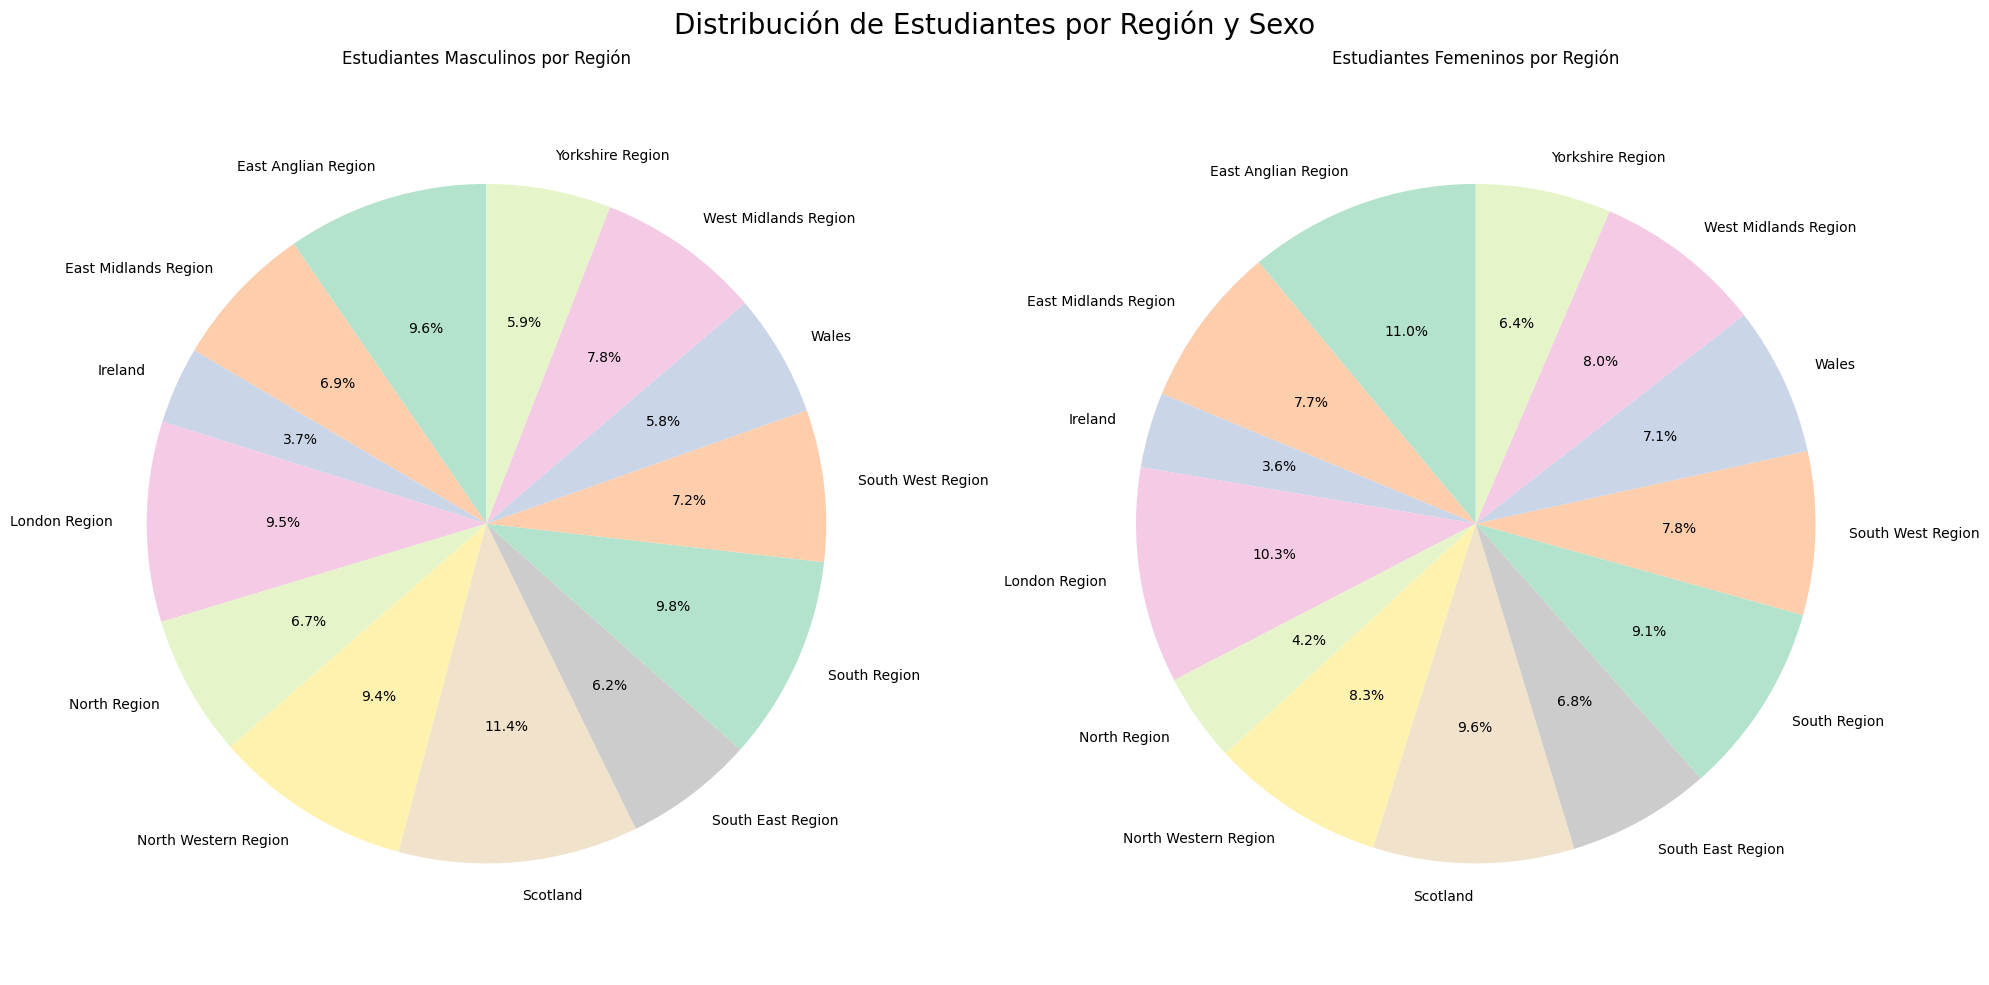

In [31]:
genders = student_info_df["gender"].unique()

# Gráfico de torta para la cantidad de estudiantes por región y sexo
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Distribución de Estudiantes por Región y Sexo', fontsize=20)

for i, gender in enumerate(genders):
    region_counts_by_gender = region_gender_counts[gender]
    
    etiquetas = region_counts_by_gender.index
    tamanos = region_counts_by_gender.values
    
    axes[i].pie(tamanos, 
                labels=etiquetas, 
                autopct='%1.1f%%', 
                shadow=False, 
                startangle=90, 
                colors=plt.cm.Pastel2.colors
                )
    
    gender_text = "Masculinos" if gender == "M" else "Femeninos"
    axes[i].set_title(f'Estudiantes {gender_text} por Región')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

**Actividad 5:**
Agregación de las notas finales y genero en un único DataFrame, con promedio ponderado de cada estudiante
por curso realizado.

In [ ]:
#Realizar agregaciones de las notas finales para obtener un único DataFrame, para ello se
#pueden usar las columnas de claves tales como: ’code_module’, ’code_presentation’, y
#’id_student’. Para la construcción del DataFrame, eliminar los exámenes y solo consid-
#erar las nota de las evaluaciones. Se debe calcular el promedio ponderado de cada estudiante
#para cada curso realizado. Incorparar la variable sexo en el dataframe.